In [10]:
### Bibliotecas básicas de gestión de datos
import pandas as pd
import numpy as np

### Bibliotecas gráficas
import matplotlib.pyplot as plt
import seaborn as sns 

### Utilidades Scikit-learn 
from sklearn.model_selection import train_test_split

### Métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc


### Modelos
from xgboost import XGBClassifier, plot_importance

In [5]:
df = pd.read_csv("Dataset/car_prices.csv")

In [6]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
import math

def assign_color(value):
    # Convertir a mayúsculas para una comparación uniforme (opcional)
     #value = value.strip().lower()

    # Asignar valores a los colores
    if value in {'4802', '2846', '339', '20627', '12655', 'white'}:  # Verificar valor vacío en caso de NaN
        return int(1)  # blanco
    elif value in {'16633', '6158', '5705', '-', 'gray'}:
        return int(2)  # gris
    elif value in {'6388', 'black'}:
        return int(3)  # negro
    elif value in {'11034', 'red'}:
        return int(4)  # rojo
    elif value in {'2711', 'silver'}:
        return int(5)  # plata
    elif value in {'2817', 'blue'}:
        return int(6)  # azul
    elif value in {'9410', '1167', '14872', 'brown'}:
        return int(7)  # marrón
    elif value in {'9887', '2846', 'beige'}:
        return int(8)  # beige
    elif value in {'18561', '9562', '5001', 'purple'}:
        return int(9)  # púrpura
    elif value in {'721', '2711', 'burgundy'}:
        return int(10)  # burdeos
    elif value in {'gold', '2172'}:
        return int(11)  # oro
    elif value in {'yellow', '18384', '9837', '20379', '15719', '6864'}:
        return int(12)  # amarillo
    elif value == 'green':
        return int(13)  # verde
    elif value == 'charcoal':
        return int(14)  # carbón
    elif value == 'orange':
        return int(15)  # naranja

    return None

In [7]:
df['color_numeric'] = df['color'].apply(assign_color)

In [8]:
df['color_numeric'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 558837 entries, 0 to 558836
Series name: color_numeric
Non-Null Count   Dtype  
--------------   -----  
531661 non-null  float64
dtypes: float64(1)
memory usage: 4.3 MB


In [11]:
df['color_numeric'] = df['color_numeric'].replace(r'^\s*$', np.nan, regex=True).fillna(4)
df['color_numeric'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 558837 entries, 0 to 558836
Series name: color_numeric
Non-Null Count   Dtype  
--------------   -----  
558837 non-null  float64
dtypes: float64(1)
memory usage: 4.3 MB


In [13]:
#Creamos un array con los estados ya sean de EEUU, CA o PR validos en la columna state
array_states = ['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj', 'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut', 'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on', 'ok', 'ms', 'nm', 'al']


In [14]:
def assing_state(value):
    if value not in array_states:
        return int(0) #Devolvemos 0 para aquellos que no esten en el array de estados
    elif value in array_states:
        counter = 1
        for state in array_states: 
            if state == value:
                return int(counter)
            else:
                counter += 1

In [15]:
df['states_numeric'] = df['state'].apply(assing_state)

df['states_numeric'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 558837 entries, 0 to 558836
Series name: states_numeric
Non-Null Count   Dtype
--------------   -----
558837 non-null  int64
dtypes: int64(1)
memory usage: 4.3 MB


In [17]:
df['make'] = df['make'].astype(str).replace('nan', 'none')
df['make'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 558837 entries, 0 to 558836
Series name: make
Non-Null Count   Dtype 
--------------   ----- 
558837 non-null  object
dtypes: object(1)
memory usage: 4.3+ MB


In [18]:
array_brands = ['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford', 
 'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti', 
 'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini', 
 'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota', 
 'subaru', 'scion', 'porsche', 'none', 'dodge', 'fiat', 
 'chrysler', 'ferrari', 'honda', 'ram', 'smart', 
 'bentley', 'pontiac', 'saturn', 'maserati', 'mercury', 
 'hummer', 'landrover', 'mercedes', 'saab', 'suzuki', 
 'oldsmobile', 'isuzu', 'dodge tk', 'geo', 'rolls-royce', 
 'mazda tk', 'hyundai tk', 'mercedes-b', 'vw', 'daewoo', 
 'chev truck', 'ford tk', 'plymouth', 'ford truck', 'tesla', 
 'airstream', 'dot', 'aston martin', 'fisker', 'lamborghini', 'lotus']

In [19]:
def assign_brand(value):
    if value.lower() not in array_brands:
        return int(0)
    elif value in array_brands:
        counter = 1
        for brand in array_brands:
            if brand == value.lower():
                return int(counter)
            else:
                counter += 1


In [21]:
def tolower(value):
    return value.lower()

df['make']=df['make'].apply(tolower)

In [22]:
df['make_numeric'] =df['make'].apply(assign_brand)
df['make_numeric'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 558837 entries, 0 to 558836
Series name: make_numeric
Non-Null Count   Dtype
--------------   -----
558837 non-null  int64
dtypes: int64(1)
memory usage: 4.3 MB


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            558837 non-null  int64  
 1   make            558837 non-null  object 
 2   model           548438 non-null  object 
 3   trim            548186 non-null  object 
 4   body            545642 non-null  object 
 5   transmission    493485 non-null  object 
 6   vin             558833 non-null  object 
 7   state           558837 non-null  object 
 8   condition       547017 non-null  float64
 9   odometer        558743 non-null  float64
 10  color           558088 non-null  object 
 11  interior        558088 non-null  object 
 12  seller          558837 non-null  object 
 13  mmr             558799 non-null  float64
 14  sellingprice    558825 non-null  float64
 15  saledate        558825 non-null  object 
 16  color_numeric   558837 non-null  float64
 17  states_num

In [24]:
cars = df[['year','make_numeric','condition','odometer','color_numeric','states_numeric','mmr','sellingprice']]

In [25]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            558837 non-null  int64  
 1   make_numeric    558837 non-null  int64  
 2   condition       547017 non-null  float64
 3   odometer        558743 non-null  float64
 4   color_numeric   558837 non-null  float64
 5   states_numeric  558837 non-null  int64  
 6   mmr             558799 non-null  float64
 7   sellingprice    558825 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 34.1 MB


In [26]:
cars.describe()

,year,make_numeric,condition,odometer,color_numeric,states_numeric,mmr,sellingprice
count,558837.000000,558837.000000,547017.000000,558743.000000,558837.000000,558837.000000,558799.000000,558825.000000
mean,2010.038927,13.497061,30.672365,68320.017767,3.870198,10.243890,13769.377495,13611.358810
std,3.966864,10.486573,13.402832,53398.542821,2.712219,7.828328,9679.967174,9749.501628
min,1982.000000,0.000000,1.000000,1.000000,1.000000,0.000000,25.000000,1.000000
25%,2007.000000,5.000000,23.000000,28371.000000,2.000000,3.000000,7100.000000,6900.000000
50%,2012.000000,8.000000,35.000000,52254.000000,3.000000,9.000000,12250.000000,12100.000000
75%,2013.000000,23.000000,42.000000,99109.000000,5.000000,15.000000,18300.000000,18200.000000
max,2015.000000,65.000000,49.000000,999999.000000,15.000000,37.000000,182000.000000,230000.000000


In [30]:


columns_with_missing_values = ["condition", "odometer", "mmr", "sellingprice"]

for col in columns_with_missing_values:
    # Calcular la media y redondearla al entero más cercano
    mean_value = np.round(np.mean(cars[col]))
    
    # Reemplazar los valores 0 con la media redondeada
    cars[col] = cars[col].replace(to_replace=0, value=mean_value)

print(cars)

        year  make_numeric  condition  odometer  color_numeric  \
0       2015             1        5.0   16639.0            1.0   
1       2015             1        5.0    9393.0            1.0   
2       2014             2       45.0    1331.0            2.0   
3       2015             3       41.0   14282.0            1.0   
4       2014             2       43.0    2641.0            2.0   
...      ...           ...        ...       ...            ...   
558832  2015             1       45.0   18255.0            5.0   
558833  2012            33        5.0   54393.0            1.0   
558834  2012             2       48.0   50561.0            3.0   
558835  2015             4       38.0   16658.0            1.0   
558836  2014             7       34.0   15008.0            2.0   

        states_numeric      mmr  sellingprice  
0                    1  20500.0       21500.0  
1                    1  20800.0       21500.0  
2                    1  31900.0       30000.0  
3              

C:\Users\diego\AppData\Local\Temp\ipykernel_8864\707077908.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars[col] = cars[col].replace(to_replace=r'^\s*$', value=mean_value)


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            558837 non-null  int64  
 1   make_numeric    558837 non-null  int64  
 2   condition       547017 non-null  float64
 3   odometer        558743 non-null  float64
 4   color_numeric   558837 non-null  float64
 5   states_numeric  558837 non-null  int64  
 6   mmr             558799 non-null  float64
 7   sellingprice    558825 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 34.1 MB


In [29]:
cars['condition'].to_csv('Dataset/condition.csv', index = True)

In [32]:
cars['odometer'].to_csv('Dataset/odometer.csv',index = True)

In [33]:
cars['mmr'].to_csv('Dataset/mmr.csv', index = True)

In [34]:
cars['sellingprice'].to_csv('Dataset/sellingprice.csv',index = True)

In [ ]:
424161 #Valor vacio de mmr

In [39]:
cars['mmr'].iloc[424161]

numpy.float64

In [40]:
mean_value = np.round(np.mean(cars['mmr']))

In [43]:
df['mmr'] = df['mmr'].fillna(mean_value)

In [44]:

df['mmr'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 558837 entries, 0 to 558836
Series name: mmr
Non-Null Count   Dtype  
--------------   -----  
558837 non-null  float64
dtypes: float64(1)
memory usage: 4.3 MB


In [45]:
cars = df[['year','make_numeric','condition','odometer','color_numeric','states_numeric','mmr','sellingprice']]

In [46]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            558837 non-null  int64  
 1   make_numeric    558837 non-null  int64  
 2   condition       547017 non-null  float64
 3   odometer        558743 non-null  float64
 4   color_numeric   558837 non-null  float64
 5   states_numeric  558837 non-null  int64  
 6   mmr             558837 non-null  float64
 7   sellingprice    558825 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 34.1 MB


In [47]:
mean_value = np.round(np.mean(cars['sellingprice']))
df['sellingprice'] = df['sellingprice'].fillna(mean_value)

In [48]:
mean_value = np.round(np.mean(cars['condition']))
df['condition'] = df['condition'].fillna(mean_value)

In [49]:
mean_value = np.round(np.mean(cars['odometer']))
df['odometer'] = df['odometer'].fillna(mean_value)

In [50]:
cars = df[['year','make_numeric','condition','odometer','color_numeric','states_numeric','mmr','sellingprice']]

In [51]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            558837 non-null  int64  
 1   make_numeric    558837 non-null  int64  
 2   condition       558837 non-null  float64
 3   odometer        558837 non-null  float64
 4   color_numeric   558837 non-null  float64
 5   states_numeric  558837 non-null  int64  
 6   mmr             558837 non-null  float64
 7   sellingprice    558837 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 34.1 MB


In [55]:
target = 'sellingprice'
car_features = list(cars.columns)

car_features.remove(target)
print(car_features)

['year', 'make_numeric', 'condition', 'odometer', 'color_numeric', 'states_numeric', 'mmr']


In [54]:
cars.drop(target, axis = 1).isin([0]).sum()

year                  0
make_numeric      10649
condition             0
odometer              0
color_numeric         0
states_numeric       87
mmr                   0
dtype: int64

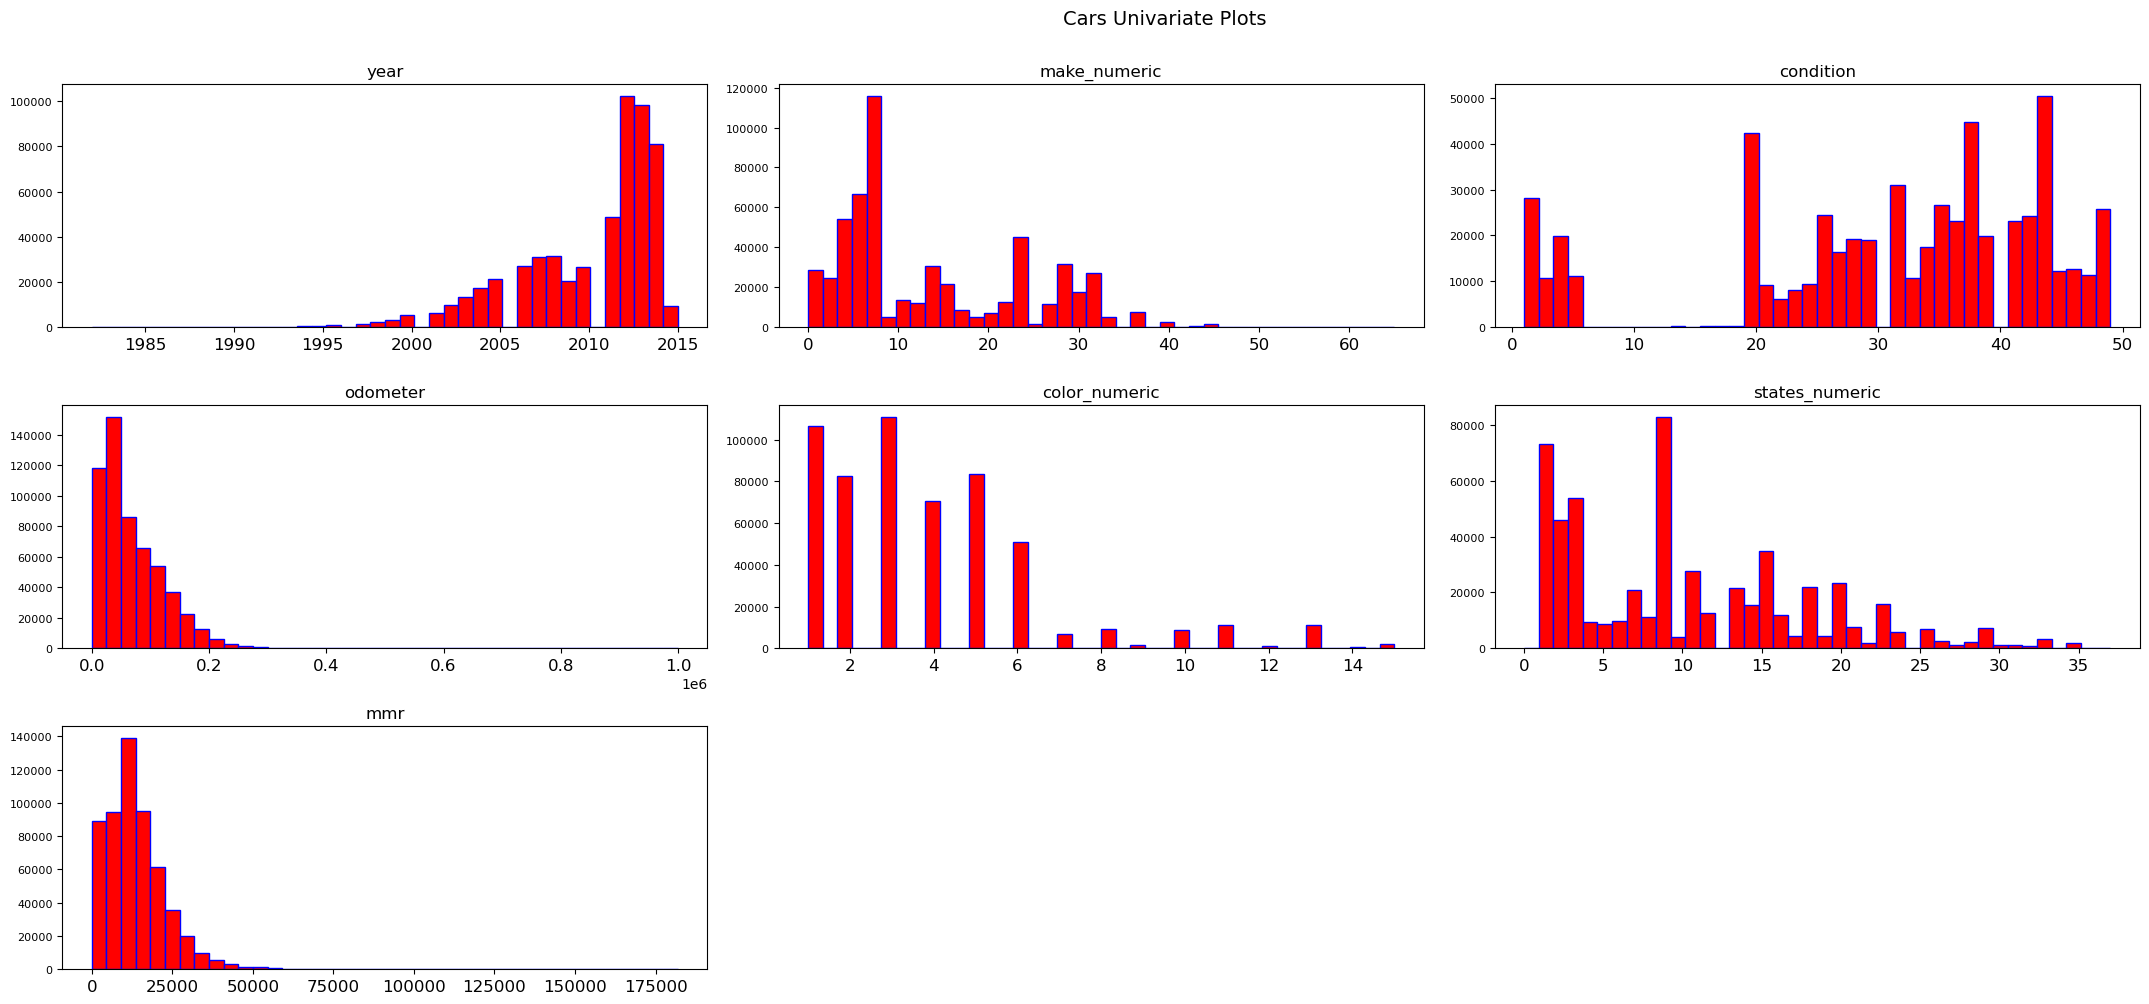

In [56]:
cars[car_features].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=12, ylabelsize=8, grid=False, 
                          figsize=(18,8), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Cars Univariate Plots', x=0.65, y=1.25, fontsize=14);

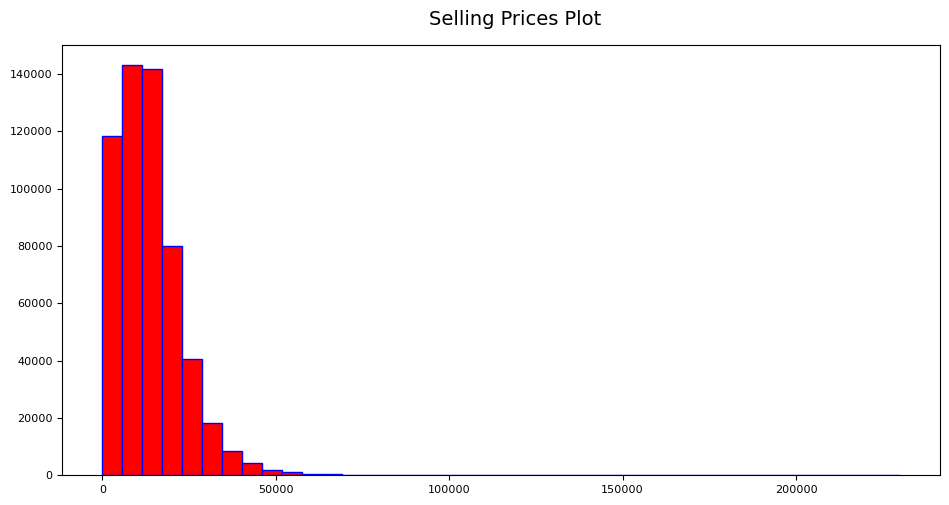

In [57]:
cars[target].hist(bins=40, edgecolor='b', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False, figsize=(8,4), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Selling Prices Plot', x=0.65, y=1.25, fontsize=14);  

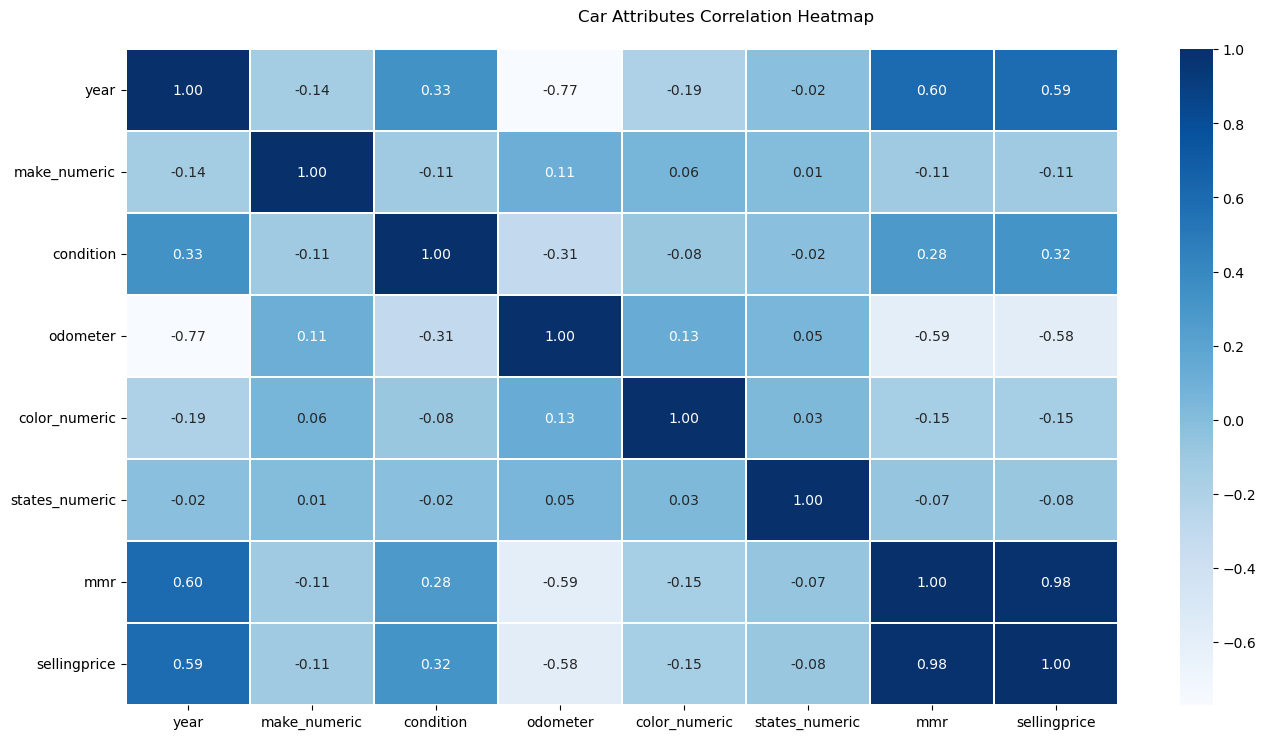

In [58]:
# Visualizamos las correlaciones
f, ax = plt.subplots(figsize=(16, 8))
corr = cars.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Car Attributes Correlation Heatmap', fontsize=12)

c:\Users\diego\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instea

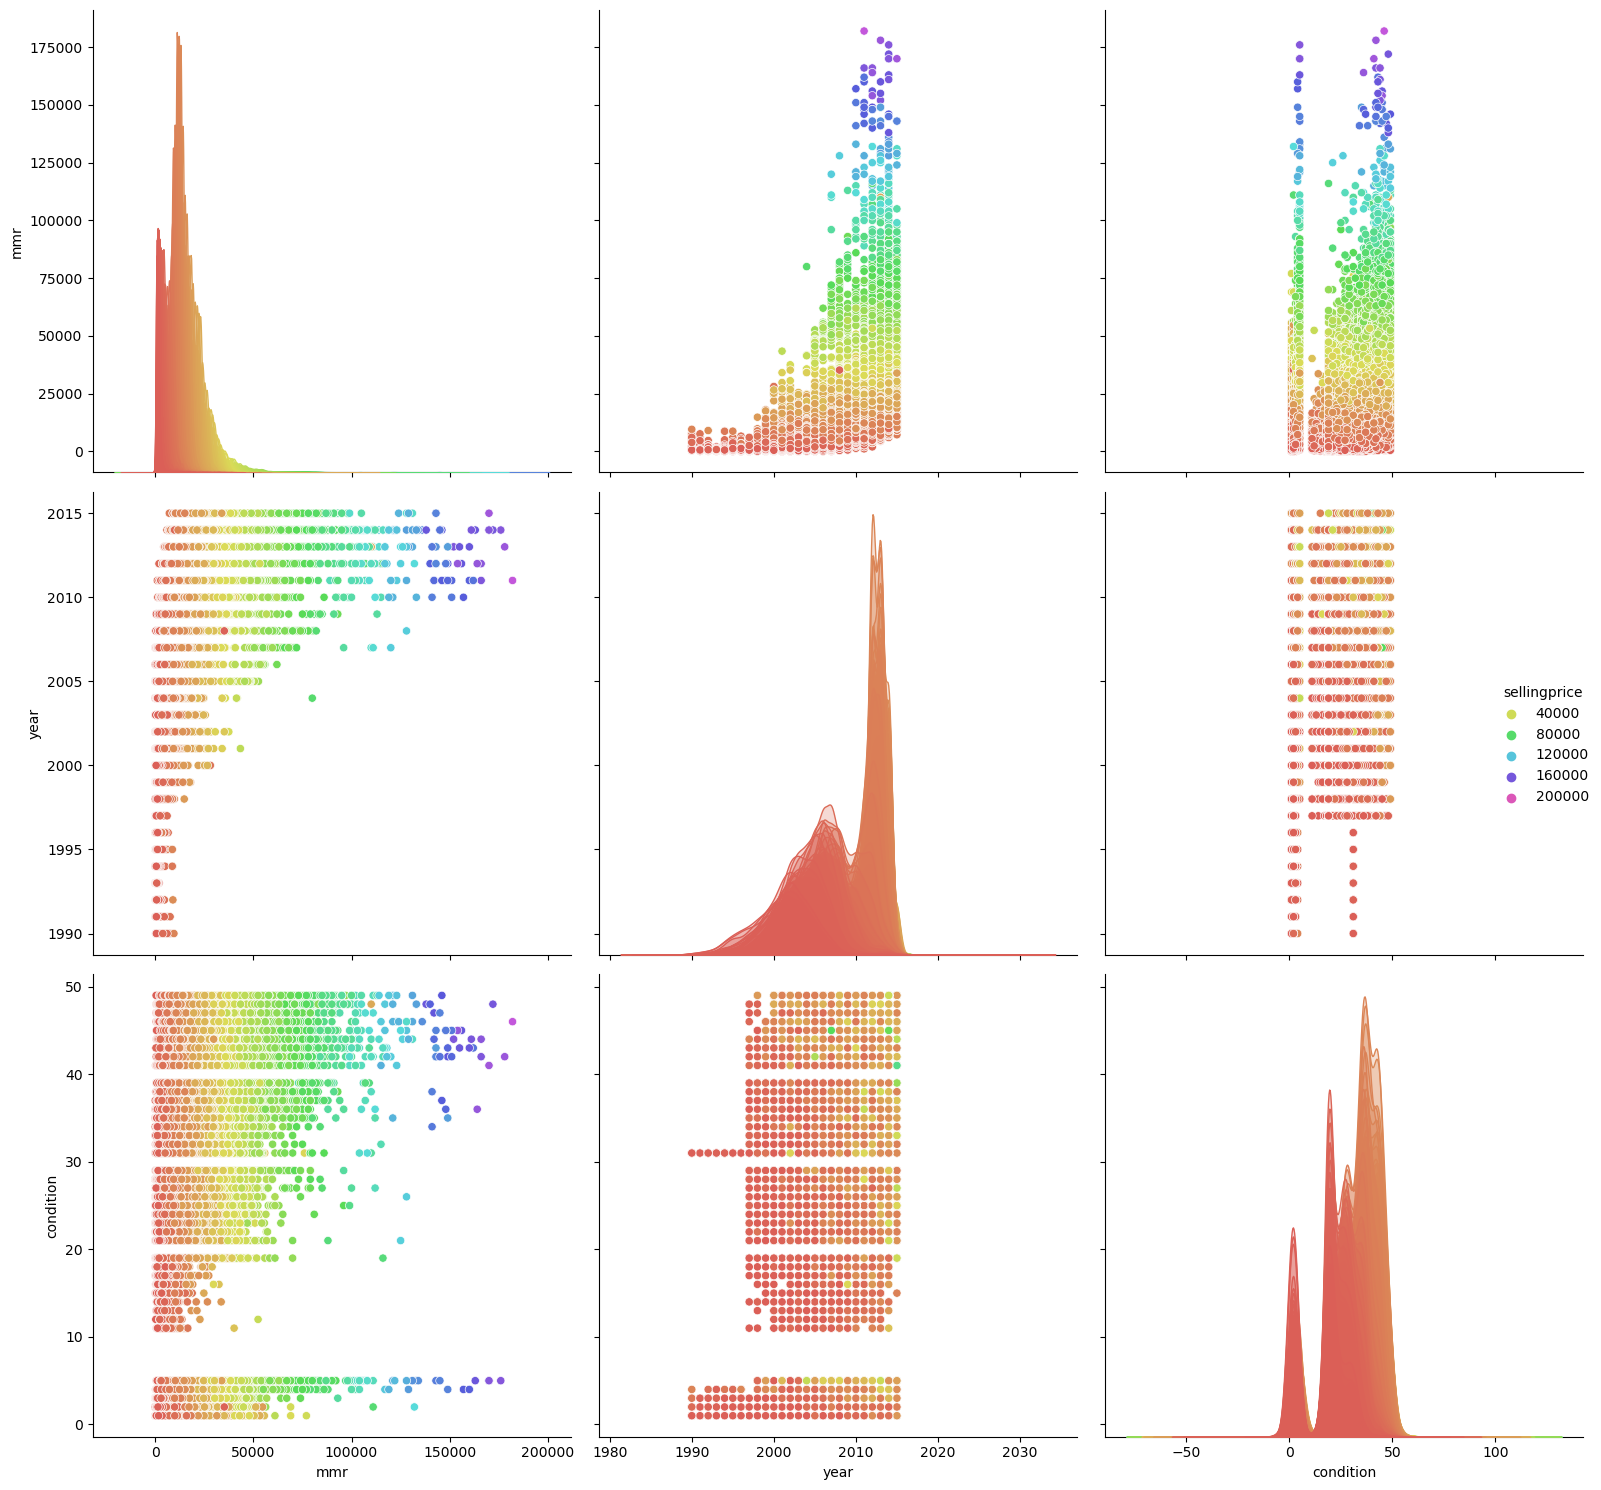

In [60]:
sns.pairplot( df.dropna(), vars=[ 'mmr', 'year','condition'], size=5, diag_kind='kde', palette='hls', hue='sellingprice' )
plt.tight_layout( )
plt.show()

In [61]:
# Importar las versiones de regresión de los modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Importaciones para el preprocesamiento y evaluación del modelo
from sklearn.model_selection import KFold, cross_val_score
from sklearn import model_selection
from sklearn.metrics import  mean_absolute_error, r2_score

In [62]:
carsCl = cars.copy()

In [63]:
carsCl.head()

,year,make_numeric,condition,odometer,color_numeric,states_numeric,mmr,sellingprice
0,2015,1,5.0,16639.0,1.0,1,20500.0,21500.0
1,2015,1,5.0,9393.0,1.0,1,20800.0,21500.0
2,2014,2,45.0,1331.0,2.0,1,31900.0,30000.0
3,2015,3,41.0,14282.0,1.0,1,27500.0,27750.0
4,2014,2,43.0,2641.0,2.0,1,66000.0,67000.0


In [65]:
target = carsCl.iloc[:, -1]
#target = diabetes[["Outcome"]]

diabetesCl = carsCl.iloc[:, :-1]
#diabetesCL = diabetes[["Glucose", "Pregnancies",...]]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(carsCl,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    )  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (419127, 8)
Number transactions y_train dataset:  (419127,)
Number transactions X_test dataset:  (139710, 8)
Number transactions y_test dataset:  (139710,)


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB  # GaussianNB no es adecuado para regresión
from xgboost import XGBRegressor

# Lista para almacenar los modelos de regresión
models = []

# Regresión lineal (en lugar de Logistic Regression)
models.append(('Linear Regression', LinearRegression()))

# Random Forest Regressor (en lugar de Random Forest Classifier)
models.append(('Random Forest', RandomForestRegressor(n_estimators=100, random_state=7)))

# KNN Regressor (en lugar de KNeighborsClassifier)
models.append(('KNN', KNeighborsRegressor()))

# Decision Tree Regressor (en lugar de DecisionTreeClassifier)
models.append(('Decision Tree', DecisionTreeRegressor(random_state=7)))

# Gaussian NB no es adecuado para regresión, por lo que lo quitamos

# XGBoost Regressor (en lugar de XGBClassifier)
models.append(('XGBoost', XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=33, n_jobs=-1)))


In [ ]:
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import  mean_absolute_error, r2_score

# Inicializar listas para almacenar resultados
mse_results = []
mae_results = []
r2_results = []
names = []

# Configurar el DataFrame para almacenar los resultados de rendimiento
col = ['Algorithm', 'MSE Mean', 'MSE STD', 
       'MAE Mean', 'MAE STD', 'R2 Mean', 'R2 STD']
df_results = pd.DataFrame(columns=col)
i = 0

# Evaluar cada modelo utilizando validación cruzada
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)  # 10-fold cross-validation

    # Evaluar usando validación cruzada
    mse_scores = model_selection.cross_val_score(
        model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    mae_scores = model_selection.cross_val_score(
        model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    r2_scores = model_selection.cross_val_score(
        model, X_train, y_train, cv=kfold, scoring='r2')

    mse_results.append(-mse_scores)  # Convertir a positivo
    mae_results.append(-mae_scores)   # Convertir a positivo
    r2_results.append(r2_scores)       # R2 ya es positivo
    names.append(name)

    # Almacenar resultados en el DataFrame
    df_results.loc[i] = [
        name,
        round(-mse_scores.mean(), 2),   # MSE (convertido a positivo)
        round(mse_scores.std(), 2),
        round(-mae_scores.mean(), 2),    # MAE (convertido a positivo)
        round(mae_scores.std(), 2),
        round(r2_scores.mean(), 2),      # R2
        round(r2_scores.std(), 2)
    ]
    i += 1

# Ordenar resultados por MSE Mean
df_results.sort_values(by=['MSE Mean'], ascending=True, inplace=True)  # MSE más bajo es mejor
print(df_results)
